# Understand and Optimizing Plan Giving Mailing Strategy

## Objective: 
* To understand what factors contributed most to convert regular donors to plan giving donors.
* To perform EDA to find any meaningful patterns of convertion.
* To create a model that predicts the likelihood if a certain donor will leave bequest.
* To create or improve different mailing strategies on targeted donors. 

The implementation of this model will allow non-profit to create better decision-making actions.

## We'll be covering:
 * Descriptive Analytics - what happened? 
 * Predictive Analytics - What might happen?
 * Prescriptive Analytics  - What should we do?  

## Dataset Variables:  

* Length - Donor's lifetime = (Deceased date/To date - First gift date)
* Age - Donor's Age
* Lapsed Time (in month) - Calculate the date difference between last gift date and current date.
* PG donors - Search all transactions and label the donor as PG donor if he/she donated to any plan giving campaigns (newsletter, PG card and etc..)
* Avg Giving Cycle (in month )- Donation frequency. 
* Appeal Desciption - Appeal description for donor's first gift
* Total Amount of Gift - Total gift amount before donors become plan giving donors.

## Imports Packages and Load Datasets

## Data Quality Check

#Remove 1 time DM donor.


In [13]:
#Display the statistical overview of living bequest donors

,Constituent ID,Age,Total Amount of Gifts,Gift Amount,avg giving circle month,lapsed time,length,PG donor,Convert
count,2.540000e+02,246.000000,2.540000e+02,254.000000,240.000000,254.000000,254.000000,254.000000,254.0
mean,3.328792e+05,72.626016,7.184804e+06,3284.715433,10.883333,35.708661,142.145669,0.078740,1.0
std,4.397280e+05,12.425056,8.766777e+07,24509.244703,12.381105,23.655669,105.153673,0.269865,0.0
min,1.540000e+03,25.000000,0.000000e+00,0.000000,1.000000,1.000000,5.000000,0.000000,1.0
25%,5.815450e+04,67.000000,3.012500e+02,30.000000,4.000000,18.000000,82.250000,0.000000,1.0
50%,1.178525e+05,73.000000,8.900000e+02,50.000000,8.500000,32.000000,137.500000,0.000000,1.0
75%,1.989210e+05,81.000000,4.476250e+03,100.000000,13.000000,50.000000,183.750000,0.000000,1.0
max,1.349416e+06,98.000000,1.385764e+09,300000.000000,136.000000,133.000000,1300.000000,1.000000,1.0


In [14]:
#Display the statistical overview of deceased bequest donors

,Constituent ID,Age,Total Amount of Gifts,Gift Amount,avg giving circle month,length,lapsed time,PG donor,Convert
count,1.190000e+02,41.000000,1.190000e+02,119.000000,110.000000,54.000000,100.000000,119.000000,119.0
mean,6.454338e+05,81.634146,2.019089e+05,634.493445,14.354545,149.740741,42.640000,0.016807,1.0
std,5.199095e+05,9.205314,1.965858e+06,2843.140811,14.337726,75.999301,40.731821,0.129090,0.0
min,3.247000e+03,59.000000,1.000000e+01,5.000000,1.000000,13.000000,2.000000,0.000000,1.0
25%,5.864050e+04,76.000000,2.600000e+02,25.000000,8.000000,96.500000,15.000000,0.000000,1.0
50%,1.001999e+06,82.000000,5.800000e+02,50.000000,11.000000,147.000000,31.500000,0.000000,1.0
75%,1.024868e+06,88.000000,2.624530e+03,100.000000,15.750000,190.750000,50.000000,0.000000,1.0
max,1.361742e+06,98.000000,2.141742e+07,25000.000000,108.000000,333.000000,257.000000,1.000000,1.0


In [15]:
#Display the statistical overview of regular DM donors

,Constituent ID,Age,Total Amount of Gifts,Gift Amount,avg giving circle month,lapsed time,length,PG donor,Convert
count,7.505200e+04,59818.000000,7.505200e+04,7.505200e+04,75052.000000,75052.000000,75052.000000,75052.000000,75052.0
mean,2.384349e+05,71.920375,1.646320e+05,1.510849e+03,14.613122,33.879524,84.308386,0.024050,0.0
std,9.409478e+05,14.660757,1.201533e+07,6.251447e+04,14.063458,33.448722,37.496101,0.153205,0.0
min,2.000000e+00,1.000000,0.000000e+00,0.000000e+00,1.000000,0.000000,1.000000,0.000000,0.0
25%,6.635600e+04,64.000000,1.000000e+02,2.500000e+01,7.000000,8.000000,51.000000,0.000000,0.0
50%,1.160175e+05,73.000000,2.350000e+02,5.000000e+01,12.000000,20.000000,94.000000,0.000000,0.0
75%,1.743235e+05,82.000000,6.750000e+02,1.000000e+02,17.000000,56.000000,118.000000,0.000000,0.0
max,2.393136e+08,116.000000,2.371200e+09,1.000000e+07,126.000000,126.000000,127.000000,1.000000,0.0


In [16]:
#Display the records with file length greater than 300

,Constituent ID,Name,First Name,Last Name,Age,Total Amount of Gifts,Gift Amount,Gift Date,Appeal Description,avg giving circle month,lapsed time,length,PG donor,Convert
1,1002302,Michael A. Replogle,Michael,Replogle,64.0,1510.00,50.00,1988-02-12,DM,14.0,59,366,0,1
2,1004065,Kathleen Hanold,Kathleen,Hanold,89.0,425.00,15.00,1989-01-13,DM,36.0,64,355,0,1
3,1004379,Maile N. Johnson,Maile,Johnson,68.0,715.00,15.00,1990-07-18,DM,14.0,56,337,0,1
4,1005044,Miriam Berkley,Miriam,Berkley,74.0,560.00,20.00,1990-12-12,DM,22.0,14,332,0,1
5,1006922,Edward Eitches,Edward,Eitches,69.0,239.00,20.00,1991-12-20,DM,30.0,17,320,0,1
6,1007116,Fay Clayton,Fay,Clayton,71.0,216520.00,120.00,1991-12-31,DM,7.0,35,320,0,1
7,1007154,Cheryl Greenberg,Cheryl,Greenberg,60.0,1415.00,20.00,1991-12-31,DM,13.0,44,320,0,1
8,1007226,Shoshana Rihn,Shoshana,Rihn,87.0,11800.00,20.00,1991-12-31,DM,19.0,8,320,1,1
9,1008401,Judith Wechsler,Judith,Wechsler,77.0,1375.00,20.00,1992-08-07,DM,9.0,19,312,0,1
11,1009475,Leonard Sussman,Leonard,Sussman,71.0,4145.00,120.00,1993-06-07,DM,20.0,33,302,0,1


In [17]:
#remove the records with length =1300 donor

In [18]:
#Display the statistical overview of living bequest donors Again

,Constituent ID,Age,Total Amount of Gifts,Gift Amount,avg giving circle month,lapsed time,length,PG donor,Convert
count,2.530000e+02,245.000000,2.530000e+02,253.000000,239.000000,253.000000,253.000000,253.000000,253.0
mean,3.301465e+05,72.644898,7.213200e+06,3297.303241,10.359833,35.581028,137.569170,0.079051,1.0
std,4.384333e+05,12.446954,8.784037e+07,24557.003309,9.374795,23.614764,75.895972,0.270354,0.0
min,1.540000e+03,25.000000,0.000000e+00,0.000000,1.000000,1.000000,5.000000,0.000000,1.0
25%,5.806400e+04,67.000000,3.000000e+02,30.000000,4.000000,18.000000,82.000000,0.000000,1.0
50%,1.174040e+05,73.000000,8.900000e+02,50.000000,8.000000,32.000000,135.000000,0.000000,1.0
75%,1.971990e+05,81.000000,4.500000e+03,100.000000,13.000000,50.000000,183.000000,0.000000,1.0
max,1.349416e+06,98.000000,1.385764e+09,300000.000000,81.000000,133.000000,366.000000,1.000000,1.0


## Check Missing Values

In [19]:
#"True" means that the variable includes missing values
#"False" means that the variable doesn't include any missing values

Constituent ID             False
Name                       False
First Name                 False
Last Name                  False
Age                         True
Total Amount of Gifts      False
Gift Amount                False
Gift Date                  False
Appeal Description         False
Deceased Date               True
avg giving circle month     True
length                      True
lapsed time                 True
PG donor                   False
Convert                    False
dtype: bool

In [20]:
#"True" means that the variable includes missing values
#"False" means that the variable doesn't include any missing values

Constituent ID             False
Name                       False
First Name                 False
Last Name                  False
Age                         True
Total Amount of Gifts      False
Gift Amount                False
Gift Date                  False
Appeal Description         False
avg giving circle month     True
lapsed time                False
length                     False
PG donor                   False
Convert                    False
dtype: bool

## Inputing missing values

There are many appoaches to handle missing values: 
* Simply remove missing values. 
* Replace with group means.
* Build machine learning models to predict missing values. 
* Apply algorithems that rebust to outliers and missing values such as Random Forest and Logistic Regression.

We use group means to replace the missing value here. 

In [24]:
###Remove records from Age less than 10


## Combine Three Datasets

* Deceased bequest donors
* Living bequest donors
* Regular DM donors

## Exploratory Data Analysis

In [28]:
# How many donors are in the dataset? 

(60189, 9)

In [29]:
# Calculate the convert rate of HRW's dataset. What is the rate of convertion?

0    0.993819
1    0.006181
Name: Convert, dtype: float64

In [30]:
# Display the statistical overview of the donors

,Constituent ID,Imr_Age,Total Amount of Gifts,avg giving circle month,lapsed time,length,PG donor,Convert
count,6.018900e+04,60189.000000,6.018900e+04,60189.000000,60189.000000,60189.000000,60189.000000,60189.000000
mean,2.514129e+05,71.943804,1.274008e+05,15.169968,32.500709,87.937732,0.028909,0.006181
std,1.042820e+06,14.642470,1.213661e+07,14.187141,32.535095,36.672219,0.167552,0.078374
min,1.700000e+01,20.000000,0.000000e+00,1.000000,0.000000,3.000000,0.000000,0.000000
25%,6.002700e+04,64.000000,9.500000e+01,8.000000,8.000000,56.000000,0.000000,0.000000
50%,1.102140e+05,73.000000,2.100000e+02,12.000000,20.000000,101.000000,0.000000,0.000000
75%,1.736460e+05,82.000000,5.500000e+02,17.000000,53.000000,119.000000,0.000000,0.000000
max,2.393136e+08,116.000000,2.371200e+09,126.000000,257.000000,366.000000,1.000000,1.000000


In [31]:
###Display the mean summary of Donors (Converted vs Non-Converted)

,Constituent ID,Imr_Age,Total Amount of Gifts,avg giving circle month,lapsed time,length,PG donor
Convert,,,,,,,
0,250296.073156,71.921561,9.728274e+04,15.191935,32.467509,87.604861,0.028721
1,431004.537634,75.520491,4.970341e+06,11.637711,37.839140,141.462764,0.059140


Comparing with regular donor group, bequest group donors have higher lapsed time and Age, total gift amount, donor time on file and lapsed time. Also, the bequest group donors have less average giving cycle which means bequest donors donated more frequently than regular donors. 




## Correlation Matrix

,Constituent ID,Imr_Age,Total Amount of Gifts,avg giving circle month,lapsed time,length,PG donor,Convert
Constituent ID,1.000000,0.021894,0.003481,-0.004206,-0.005833,0.051987,0.016724,0.013581
Imr_Age,0.021894,1.000000,-0.003024,-0.000309,0.098975,0.171177,0.070654,0.019263
Total Amount of Gifts,0.003481,-0.003024,1.000000,-0.006062,-0.006500,0.012071,-0.001795,0.031468
avg giving circle month,-0.004206,-0.000309,-0.006062,1.000000,-0.029268,0.201073,-0.041586,-0.019635
lapsed time,-0.005833,0.098975,-0.006500,-0.029268,1.000000,0.398177,-0.041972,0.012940
length,0.051987,0.171177,0.012071,0.201073,0.398177,1.000000,0.109816,0.115102
PG donor,0.016724,0.070654,-0.001795,-0.041586,-0.041972,0.109816,1.000000,0.014229
Convert,0.013581,0.019263,0.031468,-0.019635,0.012940,0.115102,0.014229,1.000000


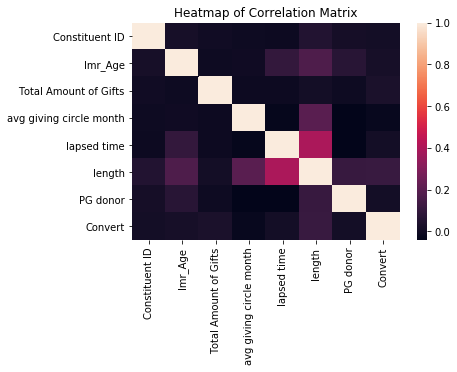

There is no significant correlation amoung all the numerical variables. 

## Pre-Processing

## EDA One --Exploratory Data Analysis for All Donors

Text(0,0.5,'Donor count')

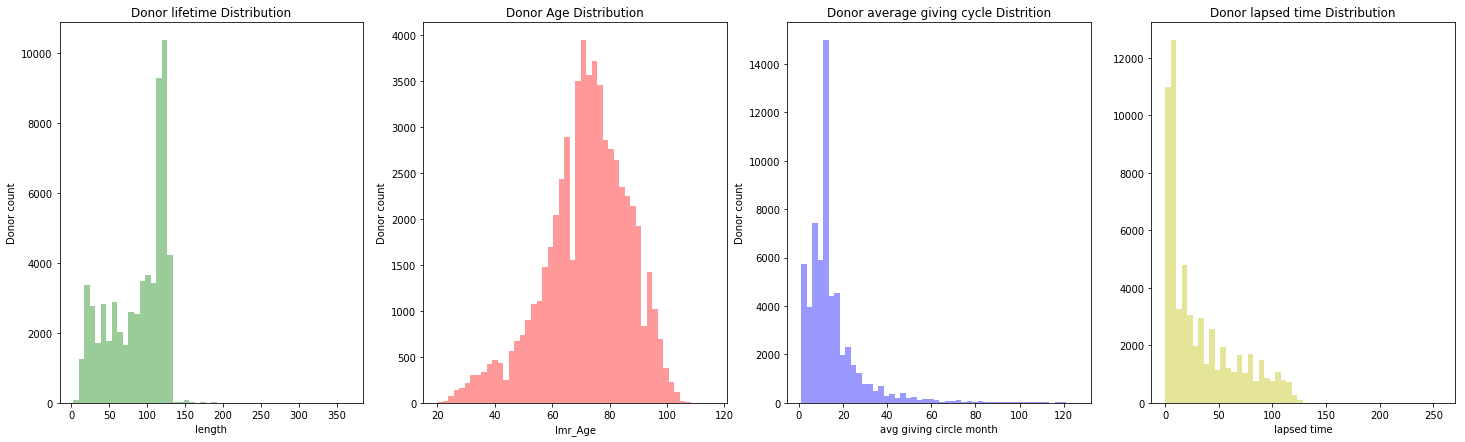

In [36]:
# Plot the distribution of donor lifetime, Age, and avg giving circle. What story can we tell?


* Donor Lifetime Distribution - Most of HRW donors fall into 110-140 month and a few donors donated more than 30 Yrs ago. 
 
* Donor Age Distribution - The majority of donors are older than 60 and most of them are within 60 - 80.
 
* Donor Average Giving Cycle Distribution - About 6000 donors donated to HRW in every 2 months, and 4000 donors donated to HRW every 4 months. Most of donors donated to HRW in every 16 months. 
 
* Donor Lapsed time  - We can see some really lapsed donors in the file, but most of donors are active. 


## EDA 2  - Comparison between Converted and Non Converted Donors

In [39]:
#what is the most effective way to acquire bequest donors?

,Appeal Description,Converted,Non_Converted
0,DM,262,47556
1,event,40,2874
2,online,29,5351
3,Unsolicited Donation,26,3311
4,Staff Solicited,14,443
5,PG(Campaign),1,269


Most of bequest donors were acquired by DM

Text(0.5,1,'Donor life time length Distribution - Converted V.S. Non Converted')

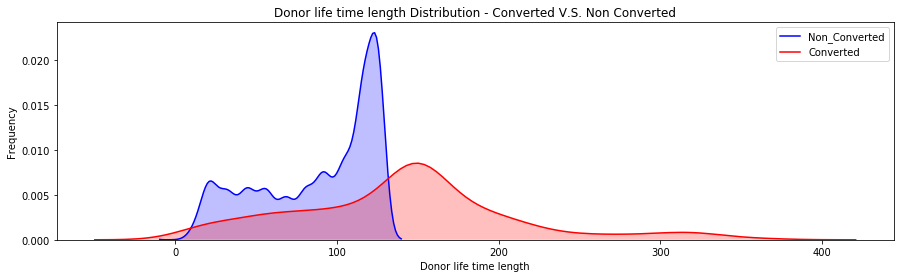

In [40]:
#KDEPlot: Kernel Density Estimate Plot for donor life time length

Text(0.5,1,'Donor Avg Giving Cycle Month Distribution - Converted V.S. Non Converted')

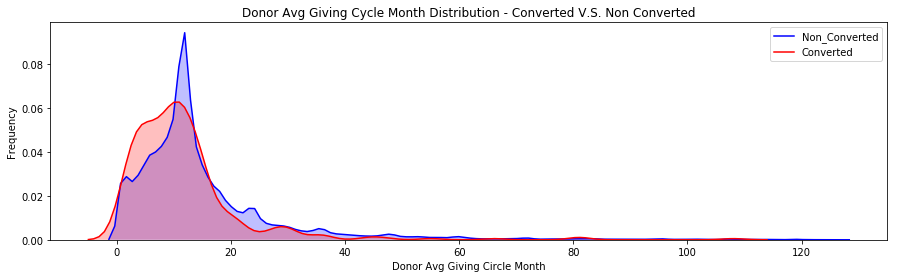

In [37]:
#KDEPlot: Kernel Density Estimate Plot for donor Avg Giving Cycle

Text(0.5,1,'Donor lapsed time Distribution - Converted V.S. Non Converted')

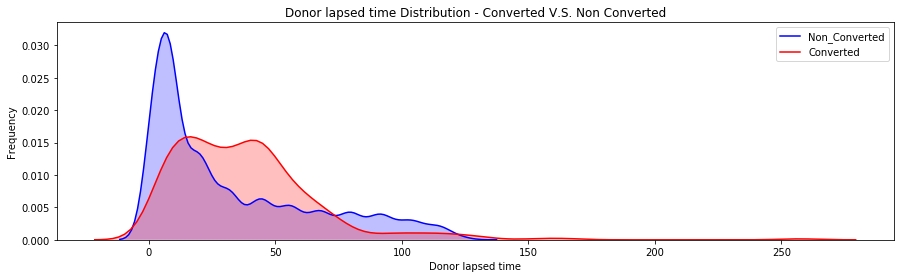

In [42]:
#KDEPlot: Kernel Density Estimate Plot for donor lapsed time 

Text(0.5,1,'Donor Age Distribution - Converted V.S. Non Converted')

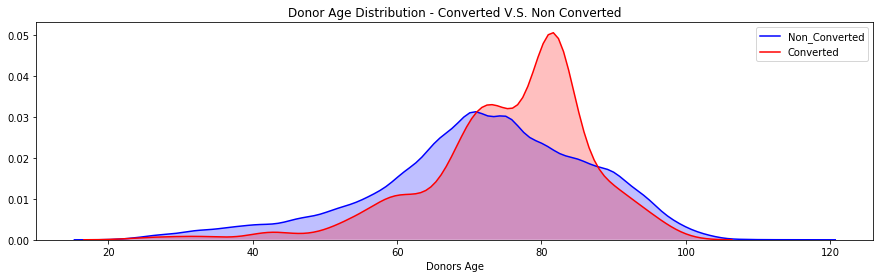

In [43]:
#KDEPlot: Kernel Density Estimate Plot for Donors Age

* Non converted donors remain active for less time than converted donors, but they give more frequently while active. 
* Converted donors are significantly older than non-converted donors.

## Class Imbalance

In [48]:
# Rate of convertion

0    0.993819
1    0.006181
Name: Convert, dtype: float64

The converted group only contain 0.6% of donors. This dataset is super imbalanced. 

Text(0,0.5,'Count')

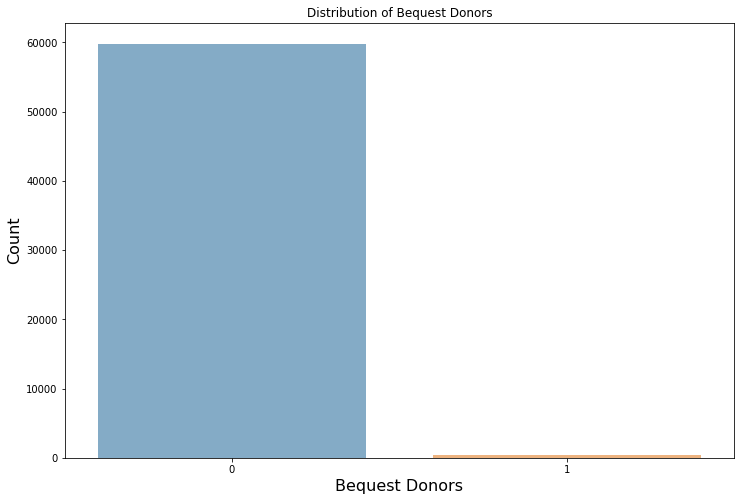

## How to Treat Imbalanced Datasets

There are many ways of dealing with imblanced dataset. We applied the following resampling approaches: 
1. Oversampling -- SMOTE (Synthetic Minority Oversampling Technique)
2. Upsampling -- RandomUnderSampler
3. Downsampling

## Split Train/Test Set

Split data into a train and test set. We will fit our model with the train set and leave our test set for our last evaluation. 

## Resample Methods

Train a base logistic regression model on the three types of samples to see which yields the best results:
1. Orginal Sample 
2. Upsampling Data
3. Downsampleing Data

## Choose Which Sampling Technique to Use For Model

Train on Original, Upsampled, SMOTE, and Downsampled Data

Objective:Train our Logistic Regression Model to our original, upsampled, and downsampled data to see which performs best.

Results: 
1. Oiginal Sample: F1 Score: 32.3%
2. Upsample: F1 Score: 74.0%
3. SMOTE: F1 Score: 75.0%
4. Downsample: F1 Scores: 71.8% 

SMOTE gives us the best performance

![Image of Resampling](https://api.ning.com/files/vvHEZw33BGqEUW8aBYm4epYJWOfSeUBPVQAsgz7aWaNe0pmDBsjgggBxsyq*8VU1FdBshuTDdL2-bp2ALs0E-0kpCV5kVdwu/imbdata.png)

## Upsample

Randomly resmple the minority class to create new data

## SMOTE

Use the nearest neighbors of the minority observations to create new synthetic data

## Downgrade

Remove some samples of the majority class

## Test Logistic Regression Performace

## Machine Learning Model

In [57]:
# Split into 75% training and 25% test dataset# Split  

In [58]:
# Build random forest model

drf Model Build progress: |███████████████████████████████████████████████| 100%


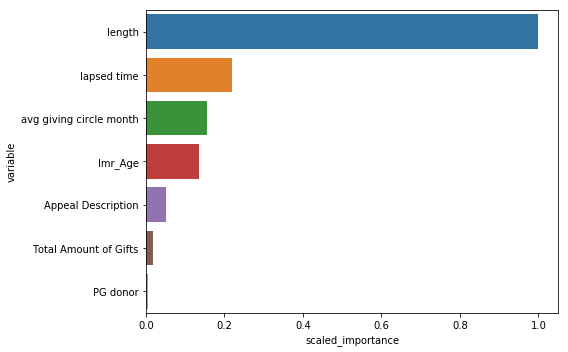

In [59]:
# Feature importance

PartialDependencePlot progress: |█████████████████████████████████████████| 100%


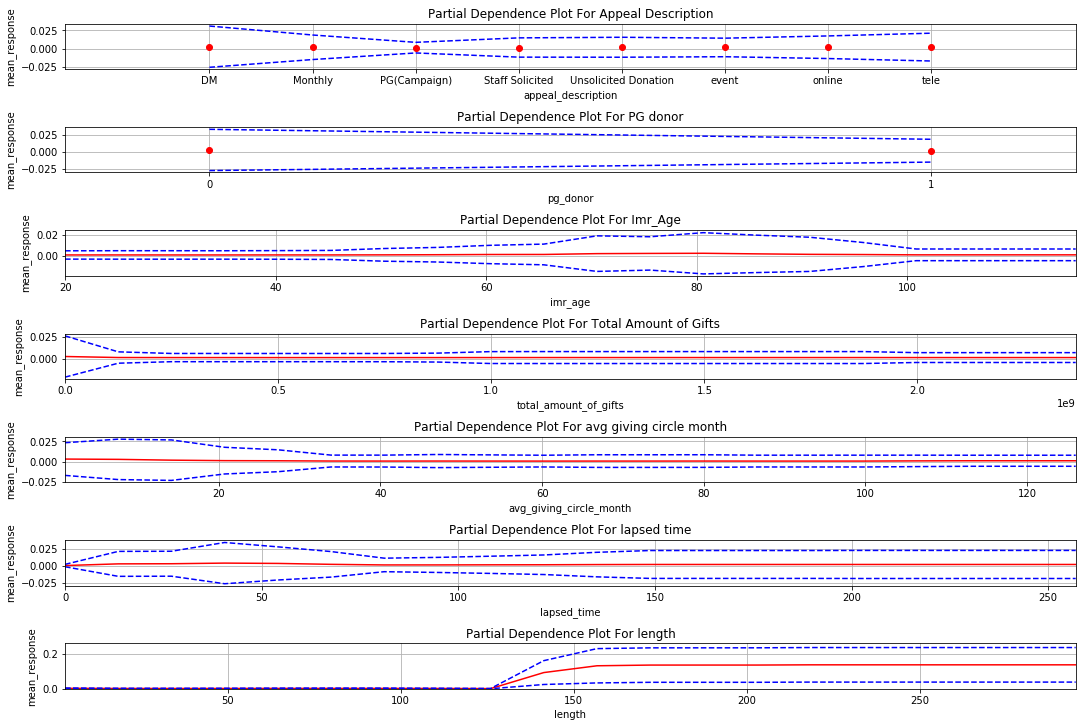

In [64]:
# Partial dependence plot

## What to Optimize
We want our mailing learn model to capture as much of the minority class as possible (converted group). Our objective is to catch all of the highly probable converted donors. 

## Conclusion










#### Binary Classification: converted vs non converted

#### Need for Application: 
In converted vs non converted project, rather than simply predicting whether an donor will leave a bequest within a certain time frame, we would much rather have an estimate of the probability that he/she will leave a bequest. We would rank donors by their probability of convert, then allocate resource/budget to the highest probability donors.

Consider a donor is given a PG package because HRW think the donor will leave a bequest in the future, but the donor actually will not. This is a false posive error. This mistake could be expensive, but is a good investment for relational growth. 

Compare this with the oppsite error, where HRW doesn't send the donor PG package and they do want to leave a bequest to non-profit organization. This is a False negative. This type of error is more detrimental because HWR may lose a huge amount of donation. 

Solution 1: 
* We can rank donors by their probability of convert, then allocate a limited budget to those highest probability donors. 

Solution 2: 
* Based on the modeling results, the most important features are length (donor lifetime) and lapsed time. We should use the following critera to select donors. 

Top tier - select top tier donors based on following rules:
* donors with first gift date before 2008. 
* donors with lapsed time less than 50 OR donors with lapsed time greater than 130.
* donors with average giving cycle less than 20 month. 
* donors with age greater than 70.
* donors came from DM. 









## Selection Bias

* One thing to note about this dateset is the super imbalenced class. A more healthy dataset should contain at least 2% converted donors. Although we applied resampling strategy and powerful machine learning algorithm, the selection bias might be large. 

* Another thing to note down is the missing values. Some records with missing age and deceased date in converted group, we have to impute a lot of missing values and we use those estimated value to build model. This will increase the selection bias as well. 